In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#read data
train_df = pd.read_csv('train.csv')

In [3]:
# Separate features and target variable in training dataset
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']

In [4]:
#training the model (100 trees in forest, 42 is the random seed)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8691709844559585
[[124   0  46   4]
 [  0 197   3   0]
 [  3   0 232   8]
 [ 34   0   3 118]]
              precision    recall  f1-score   support

           1       0.77      0.71      0.74       174
           2       1.00      0.98      0.99       200
           3       0.82      0.95      0.88       243
           4       0.91      0.76      0.83       155

    accuracy                           0.87       772
   macro avg       0.87      0.85      0.86       772
weighted avg       0.87      0.87      0.87       772



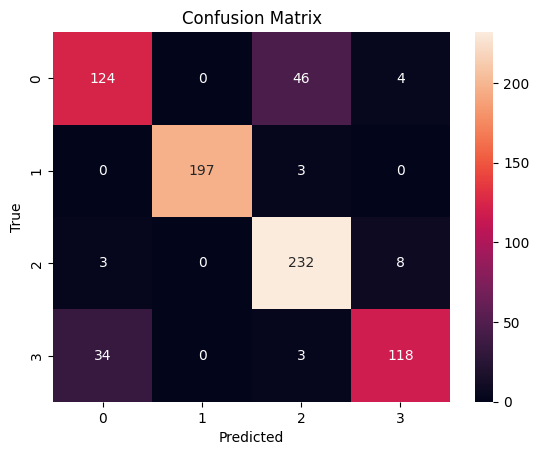

In [12]:
#make and display predictions
predictions = model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

cm = confusion_matrix(y_train, predictions)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#set up grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30, None],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
}

In [16]:
#GridSearchCV trains model for each combination of parameters
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [17]:
#run grid with training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [18]:
#inspect betst parameters and performances
best_params = grid_search.best_params_
best_grid = grid_search.best_estimator_

print("Best Parameters:", best_params)

predictions = best_grid.predict(X_train)
print("Accuracy:", accuracy_score(y_train, predictions))
print(classification_report(y_train, predictions))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       243
           4       1.00      1.00      1.00       155

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



In [19]:
#read validation data
valid_df = pd.read_csv('valid.csv')

In [20]:
# Separate features and target variable in validation dataset
X_valid = valid_df.drop('Target', axis=1)
y_valid = valid_df['Target']

In [21]:
model.fit(X_valid, y_valid)

RandomForestClassifier(random_state=42)

Accuracy: 1.0
[[25  0  0  0]
 [ 0 28  0  0]
 [ 0  0 35  0]
 [ 0  0  0 22]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        22

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



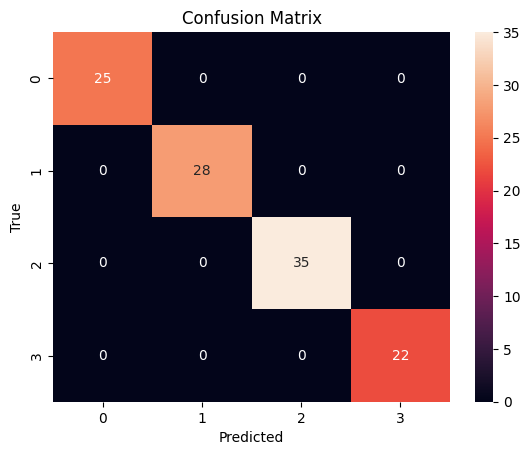

In [22]:
#make and display predictions
predictions = model.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
print(classification_report(y_valid, predictions))

cm = confusion_matrix(y_valid, predictions)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()